In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l1
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNetV2
import os
import matplotlib.pyplot as plt
import random
import numpy as np
from pathlib import Path
from keras.preprocessing.image import load_img
import cv2
# encode both columns label and variety
from sklearn.preprocessing import LabelEncoder
# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

2024-04-09 17:51:08.559265: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True,
                                   validation_split=0.2)

val_datagen = ImageDataGenerator(rescale=1./255,
                                 validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_ds = train_datagen.flow_from_directory(directory='../data/train',
                                             batch_size=32,
                                             target_size=(224, 224),
                                             class_mode='categorical',
                                             subset="training",
                                             seed=123
                                             )

validation_ds = val_datagen.flow_from_directory(directory='../data/train',
                                                batch_size=32,
                                                target_size=(224, 224),
                                                class_mode='categorical',
                                                subset="validation",
                                                seed=123
                                                )

test_ds = test_datagen.flow_from_directory(directory='../data/test',
                                           batch_size=32,
                                           target_size=(224, 224),
                                           class_mode='categorical'
                                           )

Found 1841 images belonging to 10 classes.
Found 460 images belonging to 10 classes.
Found 1025 images belonging to 10 classes.


## Visualizando las imágenes de entrenamiento

In [7]:
def visualize_images(path, num_images=5):
    # get a list of image filenames
    images_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
    
    if not images_filenames:
        raise ValueError("No images found in {}".format(path))
    
    # Select random images
    selected_images = random.sample(images_filenames, min(num_images, len(images_filenames)))
    
    # create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')
    
    # display each image
    for i, image_file in enumerate(selected_images):
        # load image
        image_path = os.path.join(path, image_file)
        image = plt.imread(image_path)
        
        # display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_file)  # set image filename as title
        
    # adjust layout and display
    plt.tight_layout()
    plt.show()

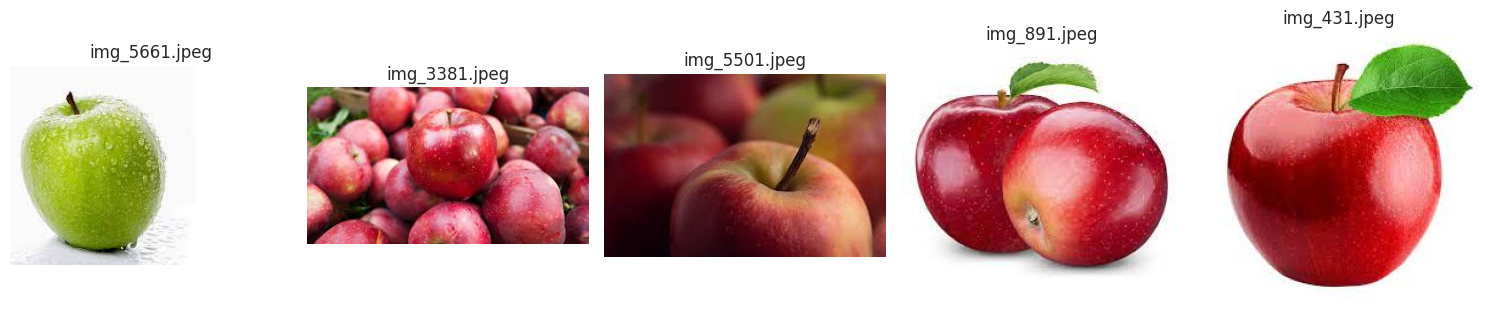

In [8]:
# Specify the path containing the images to visualice
path_to_visualice = "../data/train/Apple"

# visualize 5 random images
visualize_images(path_to_visualice)